<a href="https://colab.research.google.com/github/mithra-chips/stock-trading/blob/main/stockTrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Stocks Resources

https://docs.google.com/spreadsheets/d/1fJyqPkmF43ugiLT-v2jc9yxnruyycMbZnIFa6apAijs/edit?gid=0#gid=0



# 一些import

In [24]:
import yfinance as yf
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

In [25]:
'''
布林带指标计算
'''
def cal_bollinger_bands(close_prices, window=20, num_std=2):
    rolling_mean = close_prices.rolling(window=window).mean()
    rolling_std = close_prices.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return rolling_mean ,upper_band, lower_band

In [26]:
'''
计算下MA50, MA200的移动平均线
'''
def cal_ma(close_prices):
    ma50 = close_prices.rolling(window=50,min_periods=1).mean()
    ma200 = close_prices.rolling(window=200, min_periods=40).mean()
    return ma50, ma200

In [27]:
'''
计算短期EMA和长期EMA
'''
def cal_macd(close_prices, short_window=12, long_window=26, signal_window=9):
    short_ema = close_prices.ewm(span=short_window, adjust=False).mean()
    long_ema = close_prices.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return short_ema, long_ema, macd, signal


In [28]:
'''
计算平均、相对成交量
'''
def cal_volume(volume, window=63): # Approximately 3 months of trading days
    average_volume = volume.rolling(window=window).mean()
    # Drop null values from average_volume before calculating relative_volume
    average_volume_cleaned = average_volume.dropna()
    relative_volume = volume[average_volume_cleaned.index] / average_volume_cleaned
    return average_volume, relative_volume

In [29]:
'''
画移动平均线
'''
def plot_ma(close_prices):
    fig, ax = plt.subplots(figsize=(12, 6))
    MA50, MA200 = cal_ma(close_prices)

    MA50.plot(ax=ax, label='MA50')
    MA200.plot(ax=ax, label='MA200')
    close_prices.plot(ax=ax, label='Close Price')

    ax.set_title('MA5 vs MA200')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (JPY)')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [30]:
'''
画布林带指标
'''
def plot_bollinger_bands(close_prices):
    fig, ax = plt.subplots(figsize=(12, 6))

    close_prices.plot(ax=ax, label='Close Price')
    rolling_mean, upper_band, lower_band = cal_bollinger_bands(close_prices)
    upper_band.plot(ax=ax, label='upper', color='gray', linestyle='--')
    lower_band.plot(ax=ax, label='lower', color='gray', linestyle='--')
    rolling_mean.plot(ax=ax, label='MA20',color='orange', linestyle='--')

    ax.set_title('Bollinger Bands')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (JPY)')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    # 添加区间涂色能看得更清楚
    plt.fill_between(df2.index, upper_band, lower_band, color='gray', alpha=0.2)
    plt.show()

In [31]:
def plot_macd(close_prices):
    short_ema, long_ema, macd, signal = cal_macd(close_prices)
    histogram = macd - signal

    fig, ax = plt.subplots(figsize=(12, 6))

    macd.plot(ax=ax, label='MACD')
    signal.plot(ax=ax, label='Signal')


    ax.set_title('MACD')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (JPY)')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

In [32]:
# Calculate average and relative volume for NVDA
def plot_volume(volume):
  avg_volume, relative_volume = cal_volume(volume)

  # Create subplots
  fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                      subplot_titles=('Average Daily Volume', 'Relative Volume'),
                      vertical_spacing=0.3) # Increased vertical spacing

  # Add average volume bar chart
  fig.add_trace(go.Bar(x=avg_volume.index, y=avg_volume.values, name='Average Volume'), row=1, col=1)

  # Add relative volume line chart
  fig.add_trace(go.Scatter(x=relative_volume.index, y=relative_volume.values, mode='lines', name='Relative Volume'), row=2, col=1)

  # Update layout
  fig.update_layout(title_text='Volume Analysis',
                    xaxis=dict(title='Date'),
                    yaxis=dict(title='Volume'),
                    yaxis2=dict(title='Relative Volume'))

  # Show plot
  fig.show()

# 从yahoo finance上取得数据

# 新しいセクション

## Nvdia only

In [33]:
df2 = yf.download(["NVDA"],period="1y",interval="1d")

# 获取实时美元兑日元汇率
usd_jpy = yf.download("USDJPY=X", period="1d", interval="1m")
exchange_rate = usd_jpy['Close'].iloc[-1]
exchange_rate_value = exchange_rate.iloc[0]
print(f"实时美元兑日元汇率: {exchange_rate_value}")

# 使用实时汇率将NVDA股价转换为日元
df2.columns = ["Close","High","Low","Open","Volume"]

df2['Close'] = df2['Close'] * exchange_rate_value
df2['Open'] = df2['Open'] * exchange_rate_value
df2['Low'] = df2['Low'] * exchange_rate_value
df2['High'] = df2['High'] * exchange_rate_value

display(df2)

/tmp/ipython-input-1348914986.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1348914986.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

实时美元兑日元汇率: 148.43499755859375


,Close,High,Low,Open,Volume
Date,,,,,
2024-08-22,18361.545774,19401.746819,18266.577467,19293.424125,376189100
2024-08-23,19196.969405,19231.100301,18581.159643,18676.127944,323230300
2024-08-26,18765.161179,19477.423463,18455.030558,19226.649447,331964700
2024-08-27,19038.197229,19171.745638,18382.320844,18555.935814,303134600
2024-08-28,18639.032427,19042.648307,18198.319515,19011.485805,448101100
...,...,...,...,...,...
2025-08-15,26785.094856,27000.325150,26427.365969,26997.358081,156602200
2025-08-18,27016.653090,27154.698816,26805.875666,26807.361465,132008000
2025-08-19,26071.122881,27089.387054,26048.858537,27078.995517,185229200


## 观察一下任天堂几个指标

In [34]:
df_nintendo = yf.download(["7974.T"], period="1y", interval="1d")

if not df_nintendo.empty:
    df_nintendo.columns = ["Close","High","Low","Open","Volume"]
    display(df_nintendo)
else:
    print("Could not download data for ticker 7974. Please check the ticker symbol and try again.")

/tmp/ipython-input-1024983181.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2024-08-22,8176.276367,8232.589532,8125.890904,8204.926925,2576100
2024-08-23,8125.890625,8213.818195,8082.420815,8142.685779,2043800
2024-08-26,8013.264648,8071.553714,7972.758687,7995.481544,1994300
2024-08-27,7951.023926,7955.963677,7827.530140,7854.204797,2630700
2024-08-28,7870.999512,7912.493422,7812.710448,7854.204358,2242000
...,...,...,...,...,...
2025-08-18,14655.000000,14795.000000,14310.000000,14400.000000,4388200
2025-08-19,14275.000000,14600.000000,14100.000000,14565.000000,4671200
2025-08-20,13820.000000,14205.000000,13765.000000,14120.000000,4471300


# 数据趋势可视化


## Prepare data

### Subtask:
Select the relevant columns from the `df` DataFrame for visualization.


**Reasoning**:
Select the 'Close' price columns for both tickers from the multi-level indexed DataFrame and display the result.



In [35]:
nvda_close_prices = df2['Close']
nintendo_close_prices = df_nintendo['Close']

nvda_latest_close = df2['Close'].iloc[-1]
nintendo_latest_close = df_nintendo['Close'].iloc[-1]

display(nvda_close_prices)
print(f"Latest NVDA Close Price: {nvda_latest_close}")
print(f"Latest Nintendo Close Price: {nintendo_latest_close}")

,Close
Date,
2024-08-22,18361.545774
2024-08-23,19196.969405
2024-08-26,18765.161179
2024-08-27,19038.197229
2024-08-28,18639.032427
...,...
2025-08-15,26785.094856
2025-08-18,27016.653090
2025-08-19,26071.122881


Latest NVDA Close Price: 25973.155238620006
Latest Nintendo Close Price: 13830.0


## 移动平均线
一个无视近期波动计算一定时间窗口的指标<br />
实践上比较适合周期稳定、没突发事件的中长期波动<br />
如果中长期赶不上收盘股价趋势，说明形势变化太快了<br />


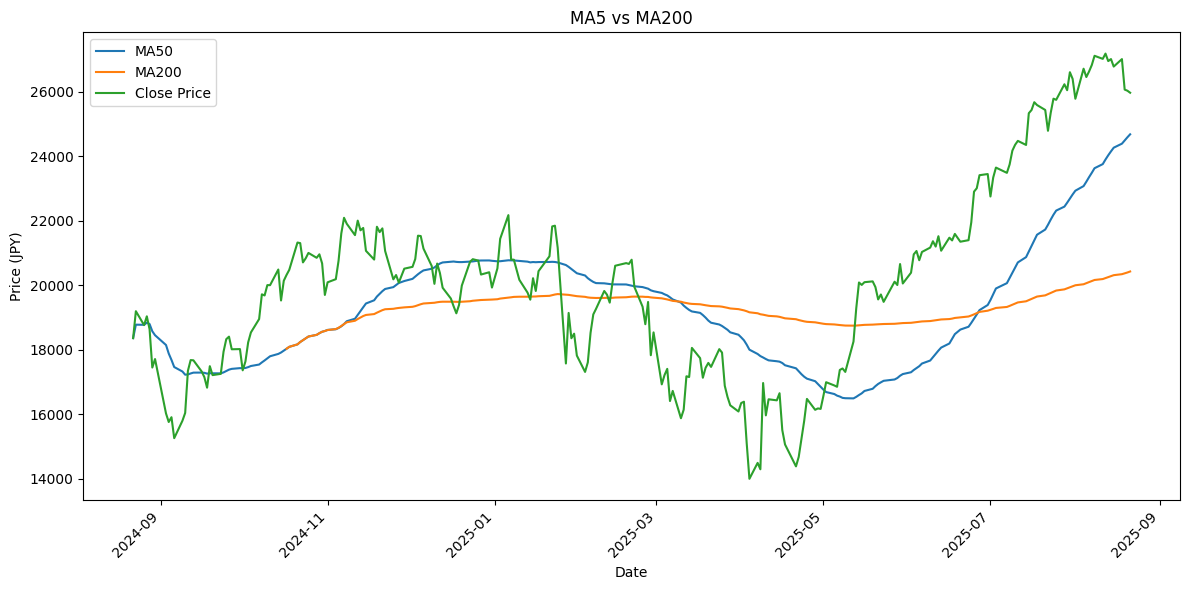

In [36]:
# 移动平均线
plot_ma(nvda_close_prices)

2025/8/8 笔者保守认为Nvida由于生成AI、代理AI的过热期待太大，以至于过去的长期主义和现在的群众情绪有了较大脱节。

这个指标的参照不太具备参考性了。

## Bollinger Bands(布林带指标)
**核心构成————三线通道**
1.   上轨 = 20日移动平均线 + 2倍标准差  
2.   中轨 = 20日简单移动平均线（SMA20）  
3.   下轨 = 20日移动平均线 - 2倍标准差

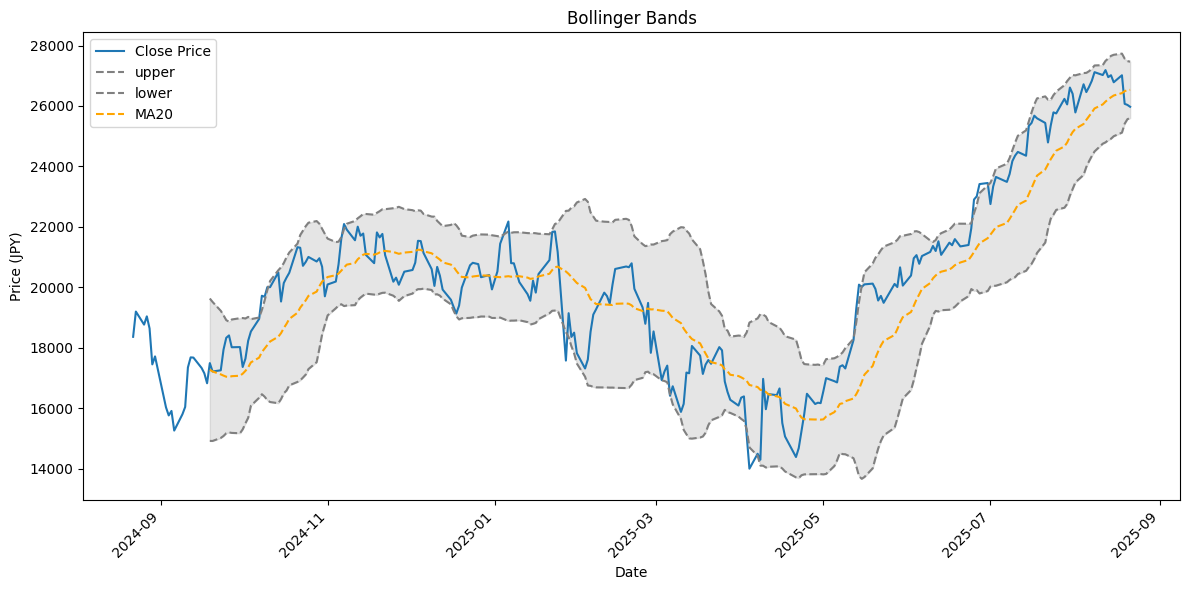

In [37]:
plot_bollinger_bands(nvda_close_prices)

**波动率温度计​​**
1.   ​通道扩张​​：上轨↑+下轨↓ → 波动率增大（趋势启动前兆，如2023年NVIDIA突破前带宽扩大35%）
2.   通道收缩​​：上下轨向中轨靠拢 → 波动率降至低位（蓄势待破信号，称“布林带挤牙膏”）

关注美股新闻、只要资金回流美国大力搞AI的话能涨；但涨幅考虑每股收益的前年比在递减、潜力有限了。

**实战上来看触及上轨的“超买”不一定、要看基本面做估值**。<br />
在意的时间点发生的事件(考虑让Agent搜索这些技术面上震荡的时间点新闻)：<br />
2025-1月：
1.   deepseek出世、舆论震荡美国AI发展信心、NVDA下跌更多是恐惧心理（他人“恐惧”我“贪婪”,机会来了）——观望和准备加仓是上策。<br />
2.   美国升级AI芯片出口限制​​：美国商务部颁布​​史上最严出口管制​​，将限制范围从中国扩展至全球，中国被列为“高风险国家”，英伟达H20芯片遭禁售，55亿美元市场面临损失

2025-3~2025-5：
1.   H20芯片遭禁与替代方案加速：美国4月无限期禁止H20对华出口，英伟达立即启动​​新款降级版芯片研发​​，计划7月交付中国客户，性能降级但保供策略明确
2.   英伟达8月紧急发文​​否认芯片存在后门​​，强调“绝不植入终止开关”，维护客户信任

2025/8:
1. 政府加大投资Nvdia以外的芯片公司、动摇股民引流到其他地方（便宜买的好机会）
2. 降息周期快来了（便宜买的好机会）

整体评价：
1.   老黄负责、稳定股价预期
2.   技术上不触发回调、暂不存在上下波动







## MACD
EMA（指数平滑移动平均线）为基础：近期价格权重更高，权重按指数衰减（如昨日EMA占86%，新数据占14%）。

所以更适合高频振荡的情境交易来参考。（比如利好/利空消息出现）

*   新品发布，比如2025/8/8 Nintendo自家IP马里奥新商品发售
*   领域内策略改革（触发了提前预估内在价值），比如今年下半年开始的加密货币周期——SBI, mizuho喝一壶。

这些感觉都能在未来反映到MA50、MA200等技术面上，拭目以待一下（Nintendo为例观察一下）




2025/8/8 实际验证了Nintendo利好消息出现的时候、移动平均线不太能很好地反映实时的趋势。
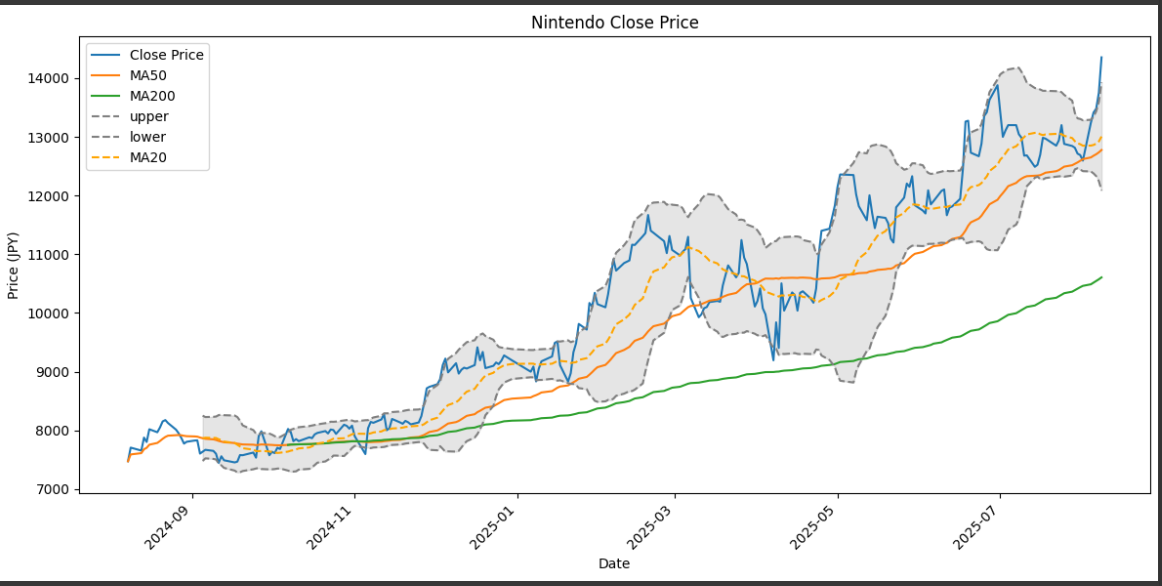

2025/8/12 看来这两天是按布林带技术指标回落了，布林带比较强的实时性啊（日均）。<br />
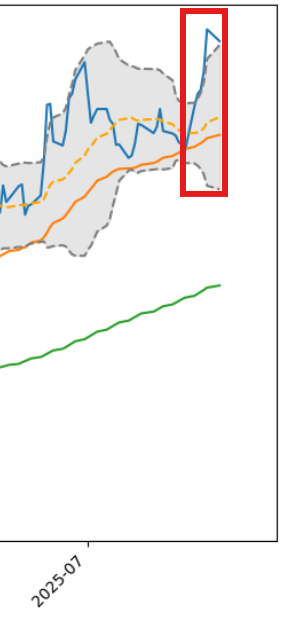

**换指数平均线(EMA)系列看看**


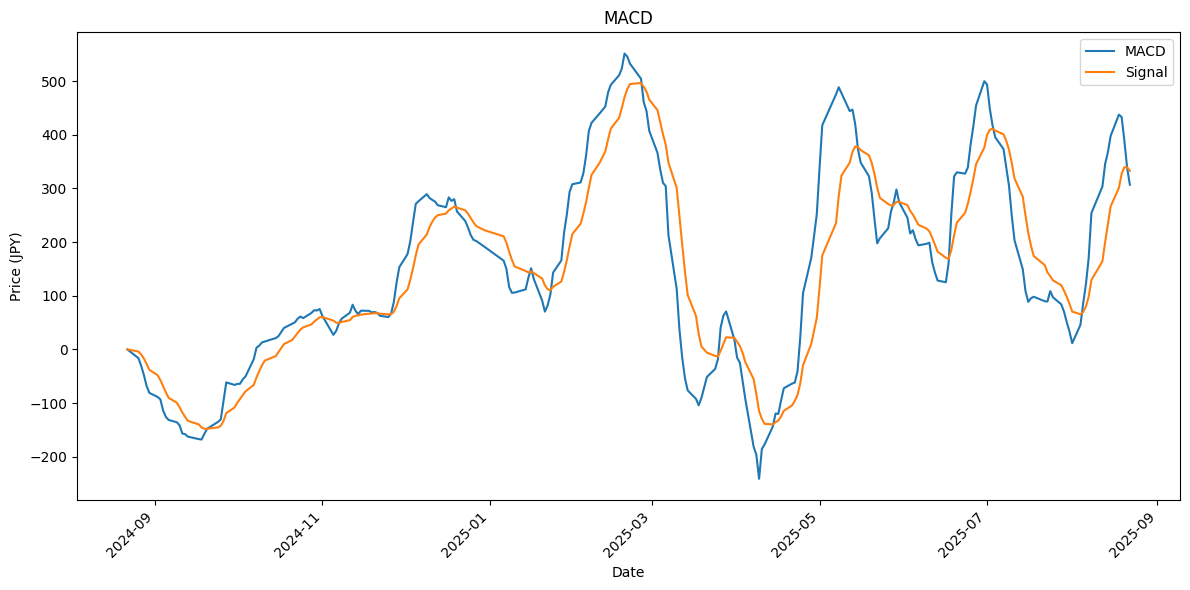

In [38]:
plot_macd(nintendo_close_prices)

# 关于Stock Market打点基础

1. 首先，它是个拍卖系统(action system)<br />
  分为一级市场(primary market)与二级市场(secondary market)
2. 其次，其成为上市公司流程：<br />
  IPO(Intial Public Offering) 首次公募 -> 发行新股 -> ... 因此吸引到公众投资
3. “我要把‘商品’放在哪家店”——股票交易所
***（今明天给出整理！）***
  就像美国的纳斯达克斯重视科技股票交易、Amex重视ETF交易
  日本TOPIX、NIKKEI分别是什么交易所？
  中国的上交所、深交所、港交所的重点又是啥？
4. "**Who**" am I? <br />
  我是investor？那我就是“持有”而不是“交易”。<br />
  我是trador？那我就是尽可能赚钱，源头就是“散户”、那就是复杂策略+博弈。<br />


5. "**Who**" are your opponents? <br />
  有时，并不是一切利好消息都能促进股票增长、比如最近我自己关注的一支股票(9722.T)。中期财报披露：
  [藤田観、今期経常を一転3％増益に上方修正・最高益更新へ
](https://kabutan.jp/news/?&b=k202508080433)<br />
  投资者视角：到了冬天这家公司就会因为温泉设施获得岁月静好的利润（再加上图表说明），我在游客访日数量大增的时候就坚持持有了。<br />
  交易员视角：机构在哪里？动向如何？夏天机构看多看空？<br />

  总的来说，都不建议这时候买入啊……

7. 啥叫**基本面分析(fundamental analysis)**？啥叫**技术分析(technical analysis)**?<br />
  2025/8/19 分析下Softbank Group(9984.T)的基本面

8. 一些数据
  **商品贸易帐**，也称为货物贸易帐，指的是一个国家在特定时期内商品出口总额与进口总额之间的差额。如果出口额大于进口额，则称为贸易顺差或出超；反之，如果进口额大于出口额，则称为贸易逆差或入超。

9. Trending
  本质就是“共识”、越多人用的工具越能巩固共识。（不作为技术分析的一环了……）

10. Whys does **Volume** matter?
  类比：一人出价买某地段房50万元vs.两万人买某地段同条件房花30万元，后者的价格“更可信”。<br />
  获得某种交易共识：当下基本面没有内在价值的突破不足以变动价格了。<br />
  这在价值投资中也有所参考。如果之后有回调等，就可以看情况慢慢买入。<br />












### 看一下Nvdia成交量

In [39]:
plot_volume(df2['Volume'])

七月中旬开始的相对成交量逐步攀升、非常热门了。

# 记录点个人心得

## 2025/8/13

最近是快速积累原始资本的两年，**目标：好股好趋势+交易员策略。**

## 2025/8/14

因为日股涨势太高(RSI MACD Bollinger Bands连月均线以上波动)，最近买入的都是S株、小幅持有，观望ing。<br />

S株：
8411.T 50 买 Bollinger Bands上限之下，技术面看好<br />
8473.T 0 买 超Bollinger Bands上限<br />
3284.T 0 买 超Bollinger Bands上限<br />
7974.T 0 买 超Bollinger Bands上限<br />





## 2025/8/18
Piper Sandler Raises NVIDIA (NVDA) Price Target to $225 Ahead of Earnings<br />
派杰投资2020年起股价翻倍仅330美元，去年2024.5压中美联储在未来9次会议将降息三次。事实是：2024年9至12月，美联储连续三次降息，累计降幅100个基点。<br />

## 2025/8/19
在蜡烛图一课中学到的：https://www.udemy.com/course/foundation-course/learn/lecture/7550446?start=690#overview

不应该看太多指标 6~7个足够做预测了。<br />
实际上的蜡烛信号（看到多空交战造成的开盘、收盘焦灼），还得观察两天，到第三天继续涨、那么顺势买入；卖出同理。<br />

看到big candle 能明白多空势力势不可挡了，能立即顺势赚钱。<br />
サンリオ为例，等踏空的地方回调了。<br />
做空最好Day trading, 避免贪婪、记得恐惧。<br />

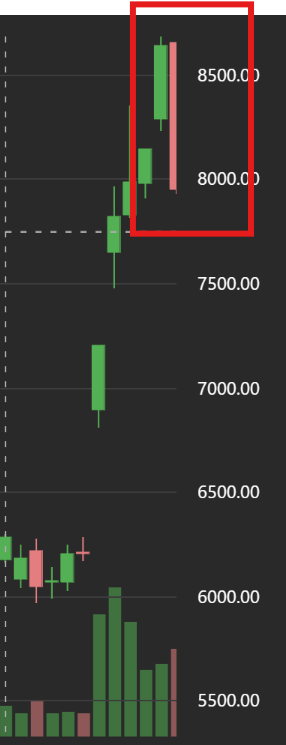

SB(9984.T)基本面
1. SoftBank makes $2B investment in Intel<br />
  有段联想：政府芯片补贴的现金转化为股权、大力投资Intel，加大出口半导体关税；日本7月承诺5000亿美元的投资

2. 员工6w+，2021~2025保持稳定涨幅。 => **是不是再关注下员工招聘的契机更保险**
3. 政治环境：和OpenAI合作、投资Trump支持的Intel，利好短期资本，因此短期的市场增量有投机的偏好。
4. 一些计算指标：市盈率22.84x；历史市盈率平均：15x以下。（第一期收益不错、有超预想的可能）
5. 投资ARM芯片中(**ARM表现不是很明白，说实话不感兴趣……**)



## 2025/8/20
1. 日本公布贸易帐（未季调）<br />
  今值-117.5B	预计196.2B	前值152.1B，出口量依旧不及预期，表现为TOPIX、日经微下调。（想买的Nintendo、スシロー还是太贵了……）

## 2025/8/21
日经继续小幅下调。<br />
看下sushiro(3563.T)、Nintendo(7974.T)、gumi(3903.T)等加密货币股的交易量。<br />


In [40]:
df_sushiro = yf.download(["3563.T"], period="1y", interval="1d")
df_sushiro.columns = ["Close","High","Low","Open","Volume"]
df_nintendo = yf.download(["7974.T"], period="1y", interval="1d")
df_nintendo.columns = ["Close","High","Low","Open","Volume"]



df_gumi = yf.download(["3903.T"], period="1y", interval="1d")
df_gumi.columns = ["Close","High","Low","Open","Volume"]
df_meta_planet = yf.download(["3350.T"], period="1y", interval="1d")
df_meta_planet.columns = ["Close","High","Low","Open","Volume"]

/tmp/ipython-input-937245802.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-937245802.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-937245802.py:8: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-937245802.py:10: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [41]:
plot_volume(df_nintendo['Volume'])
# df_nintendo['Volume']

In [42]:
plot_volume(df_sushiro['Volume'])

1. 2025/5/9 在决算期后大量交易、收盘价5750合适。<br />
2. 2025/8/6 在决算期后大量交易、收盘价7713合适。<br />
3. 一个财报周期一次大交易。<br />

餐饮行业估值困难、好方法就是定投股票。等放财报、大波动时期交易一波<br />

In [43]:
plot_volume(df_gumi['Volume'])

In [44]:
plot_volume(df_meta_planet['Volume'])

# 上传github

In [45]:
!git config --global user.name "mithra-chips"
!git config --global user.email "chyoukozhang@gmail.com"

In [46]:
!git clone https://github.com/YourGitHubUsername/my-colab-project.git

Cloning into 'my-colab-project'...
fatal: could not read Username for 'https://github.com': No such device or address
